
  # Project 2 - Ames Housing Data and Kaggle Challenge

## Project Overview
For this second project, i am given the task of predicting home prices in Ames, Iowa with the use of regression models. With different features available in the datasets, we can see which are the features that contribute to a higher home prices in the region. We can do so by analyzing the relationship between both the categorical and numerical features with tbe sale price of a home. With the use of various statistical regression models, we can find the best model which best predicts the price of a home.

For clearer understanding on the various features, you may refer to the data dictionary for the meaning behind the variables. Data dictionary can be viewed at http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## Kaggle Challenge
For the first kaggle challenge submission, i will be using the linear regression model with numeric features without doing a train test split. I will submit more entries with different variations throughout the project.

## Data Import
### Importing Relevant Libraries

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#scikit 
import scipy.stats as stats
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Importing Datasets

In [2]:
sample_sr = pd.read_csv('./datasets/sample_sub_reg.csv')
test = pd.read_csv('./datasets/kaggle_test.csv')
train = pd.read_csv('./datasets/kaggle_train.csv')

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [5]:
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


In [6]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## Data Cleaning
### Check for Missing Values

In [7]:
print(f'Missing values in train dataset: {train.isnull().sum().sum()}')
print(f'Missing values in test dataset: {test.isnull().sum().sum()}')


Missing values in train dataset: 9822
Missing values in test dataset: 4171


There seems to be quite a lot of missing values in both datasets. I will address this issue in the following parts.

Text(0, 0.5, 'Feature of Missing Value')

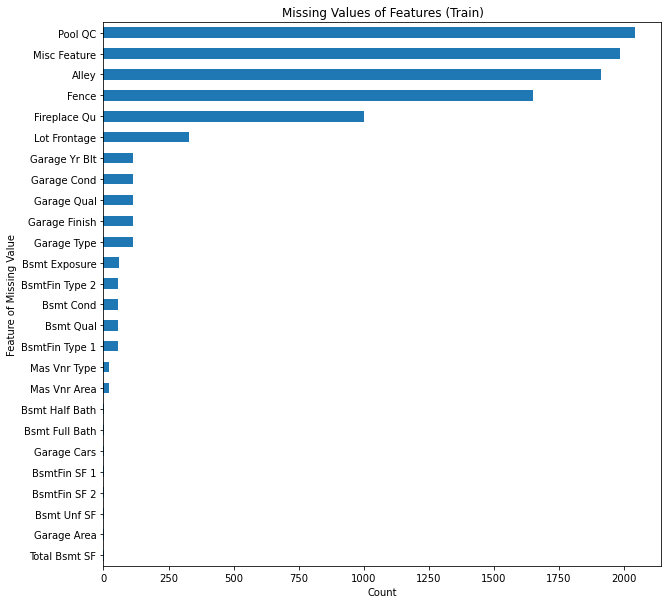

In [8]:
misval = train.isnull().sum()[train.isnull().sum()>0]
misval.sort_values().plot(kind='barh', figsize=(10,10))
plt.title('Missing Values of Features (Train)')
plt.xlabel('Count')
plt.ylabel('Feature of Missing Value')

Text(0, 0.5, 'Feature of Missing Value')

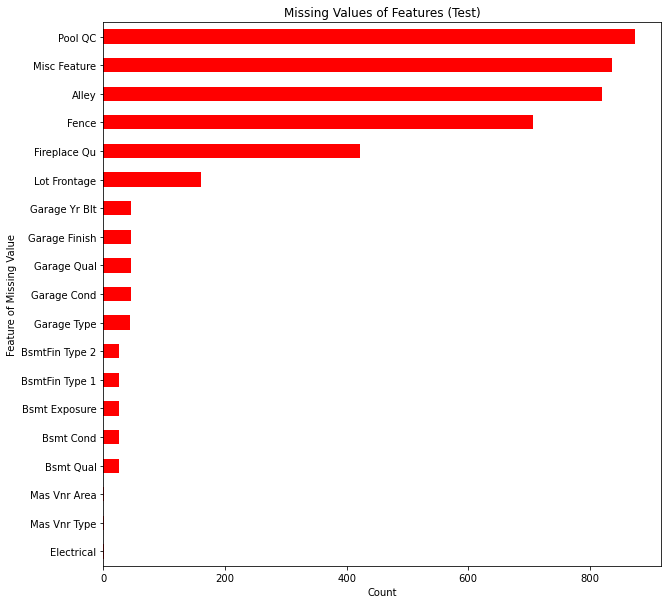

In [9]:
misval2 = test.isnull().sum()[test.isnull().sum()>0]
misval2.sort_values().plot(kind='barh', figsize=(10,10), color='r')
plt.title('Missing Values of Features (Test)')
plt.xlabel('Count')
plt.ylabel('Feature of Missing Value')

### Filling Nulls
Firstly, i will create a model by filling in the missing values with NA or '0'. I will then use the numeric features to run a train test split.

#### Replacing Missing Values with NA or 0

In [10]:
def replace_misval(data):
    data[data.select_dtypes('object').columns] = data.select_dtypes('object').fillna('NA')
    data[data.select_dtypes('int64').columns] = data.select_dtypes('int64').fillna('0')
    data[data.select_dtypes('float64').columns] = data.select_dtypes('float64').fillna('0')
    
replace_misval(train)
replace_misval(test)

print(f'Missing values in train dataset: {train.isnull().sum().sort_values(ascending=False).sum()}')
print(f'Missing values in train dataset: {test.isnull().sum().sort_values(ascending=False).sum()}')

Missing values in train dataset: 0
Missing values in train dataset: 0


## Running the Initial Linear Regression

### Model Prep: Create our features matrix (X) and target vector (y)

In [11]:
features = [col for col in train._get_numeric_data().columns if col != 'SalePrice']
X = train[features]
y = train['SalePrice']
X_val = test[features]
print(X.shape)
print(y.shape)
print(X_val.shape)

(2051, 27)
(2051,)
(878, 27)


In [20]:
X

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,109,533352170,60,13517,6,8,1976,2005,725,754,...,0,0,44,0,0,0,0,0,3,2010
1,544,531379050,60,11492,7,5,1996,1997,913,1209,...,1,0,74,0,0,0,0,0,4,2009
2,153,535304180,20,7922,5,7,1953,2007,1057,0,...,0,0,52,0,0,0,0,0,1,2010
3,318,916386060,60,9802,5,5,2006,2007,744,700,...,0,100,0,0,0,0,0,0,4,2010
4,255,906425045,50,14235,6,8,1900,1993,831,614,...,0,0,59,0,0,0,0,0,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,11449,8,5,2007,2007,1728,0,...,1,0,276,0,0,0,0,0,1,2008
2047,785,905377130,30,12342,4,5,1940,1950,861,0,...,0,158,0,0,0,0,0,0,3,2009
2048,916,909253010,50,7558,6,6,1928,1950,1172,741,...,1,0,0,0,0,0,0,0,3,2009
2049,639,535179160,20,10400,4,5,1956,1956,1200,0,...,2,0,189,140,0,0,0,0,11,2009


In [19]:
X_val

,Id,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,2658,902301120,190,9142,6,8,1910,1950,908,1020,...,0,0,60,112,0,0,0,0,4,2006
1,2718,905108090,90,9662,5,4,1977,1977,1967,0,...,0,170,0,0,0,0,0,0,8,2006
2,2414,528218130,60,17104,7,5,2006,2006,664,832,...,1,100,24,0,0,0,0,0,9,2006
3,1989,902207150,30,8520,5,6,1923,2006,968,0,...,0,0,0,184,0,0,0,0,7,2007
4,625,535105100,20,9500,6,5,1963,1963,1394,0,...,2,0,76,0,0,185,0,0,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,8000,6,6,1974,1974,1084,793,...,1,0,96,0,0,0,0,0,11,2007
874,1234,535126140,60,14670,6,7,1966,1999,1104,884,...,1,0,230,0,0,0,0,0,8,2008
875,1373,904100040,20,8250,5,5,1968,1968,1211,0,...,1,0,63,0,0,0,0,0,8,2008
876,1672,527425140,20,9000,4,6,1971,1971,864,0,...,0,0,0,0,0,0,0,0,5,2007


### Model Prep: Train/Test split

In [12]:
# Split the Model via train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model Prep: Instantiate our models

In [13]:
lr = LinearRegression()

### (1) Linear Regression
#### Define Linear Regression Function

In [14]:
def lr(X, y):
    lr = LinearRegression()
    lr.fit(X, y)
    # predictions
    pred = lr.predict(X)
    r2 = r2_score(y, pred)
    # find intercept
    lr.intercept_
    # evaluate coefficients
    lr.coef_
    return(lr, lr.intercept_, lr.coef_, r2)

#### Train, Test, Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
lr, beta0, beta1, r2score = lr(X_train, y_train)
print('Lin Reg r2 score: {}'.format(r2score))
print('Lin Reg beta0 intercept {}'.format(beta0))

Lin Reg r2 score: 0.8054008452026045
Lin Reg beta0 intercept 4593450.933772644


In [17]:
# Train and Test score
print('Train R2 score:', lr.score(X_train, y_train))
print('Test R2 score:', lr.score(X_test, y_test))
#print("Accuracy Score:", model.score(X_test,y_test))

Train R2 score: 0.8054008452026045
Test R2 score: 0.8444814601536108


Text(0.5, 1.0, 'Linear Regression Model')

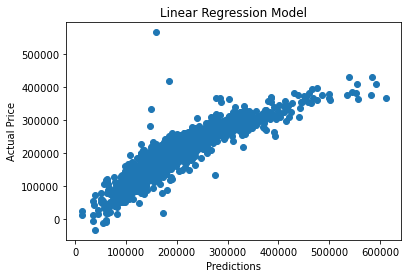

In [18]:
# The model
pred = lr.predict(X)

plt.scatter(y, pred)
plt.xlabel("Predictions")
plt.ylabel("Actual Price")
plt.title('Linear Regression Model')

## Running the Cross Validation

Cross-validated scores: [0.79141854 0.82623859 0.74968711 0.84037072 0.75031973]
Cross-Predicted Accuracy: 0.7895789909620213
Cross Validation Mean Score: 0.7684342501511432


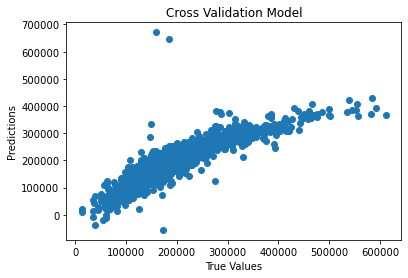

In [34]:
# Perform Cross Validation
cv_score = cross_val_score(lr, X, y, cv=5)
print("Cross-validated scores:", cv_score)

# Make cross Validated Predictions
predictions = cross_val_predict(lr, X, y, cv=5)
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Cross Validation Model')
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

cv_mean = cross_val_score(lr, X_train, y_train).mean()
print("Cross Validation Mean Score:", cv_mean)

## Kaggle First Submission - Base model without Scaling

### Predicting model on test set

In [35]:
test.shape

(878, 80)

In [36]:
kag_pred = lr.predict(X_val)

In [37]:
print(len(kag_pred))

878


In [38]:
col_ids = pd.DataFrame(X_val.iloc[:,:1])

In [39]:
predic = pd.DataFrame(kag_pred)

In [40]:
kag1 = pd.concat([col_ids, predic], axis=1)
kag1 

,Id,0
0,2658,130008.207351
1,2718,163891.422179
2,2414,220073.656587
3,1989,114841.593531
4,625,192640.124973
...,...,...
873,1662,188745.621602
874,1234,211332.615968
875,1373,131758.258818
876,1672,92440.397448


In [41]:
kag1.rename(columns = {0: 'SalePrice'}, inplace=True)

In [42]:
kag1.head()

,Id,SalePrice
0,2658,130008.207351
1,2718,163891.422179
2,2414,220073.656587
3,1989,114841.593531
4,625,192640.124973


In [43]:
# Save csv for first kaggle submission
kag1.to_csv('./datasets/kaggle1.csv', index=False)

#### Now that i have made my first submission to kaggle, i will clean the datasets and select the best model for the predictions in the following notebook. I will also refine the model to produce the best prediction based on selected features.